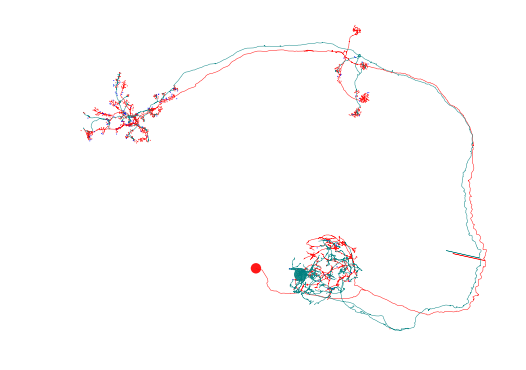

In [1]:
import pymaid
import matplotlib.pyplot as plt

# Connect to CATMAID
rm = pymaid.CatmaidInstance('https://www.your.catmaid-server.org',
                            'HTTP_USER' ,
                            'HTTP_PASSWORD',
                            'TOKEN')

# Get two example neurons by their skeleton ID
nl = pymaid.get_neurons(['57311', '27295'])

# Plot using default settings
fig, ax = nl.plot2d()
plt.show()

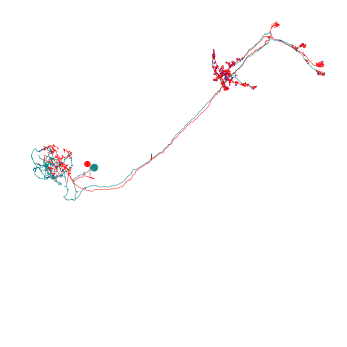

In [2]:
# Plot using matplotlib's 3D capabilities
fig, ax = nl.plot2d(method='3d_complex')
# Change from default frontal view to lateral view
ax.azim = 0
# Zoom in a bit
ax.dist = 6
plt.show()

In [3]:
# Render 3D rotation
for i in range(0, 360, 10):
   # Change rotation
   ax.azim = i
   # Save each incremental rotation as frame
   plt.savefig('frame_{0}.png'.format(i), dpi=200)

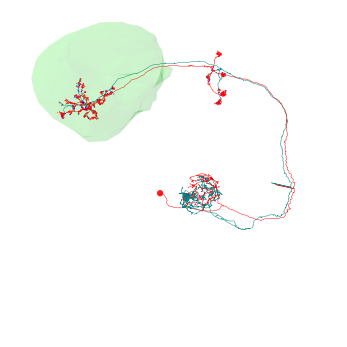

In [4]:
# Retrieve volume
lh = pymaid.get_volume('LH_R')
# Set color and alpha
lh.color = (0, 1, 0, .1)
# Plot
fig, ax = pymaid.plot2d([nl ,lh], method='3d_complex')
ax.dist = 6
plt.show()

In [5]:
# Plot using Vispy (will open 3D viewer)
viewer = nl.plot3d(backend='vispy')
# Save screenshot
viewer.screenshot('screenshot.png', alpha=True)

In [6]:
# Add another set of neurons to existing canvas
nl2 = pymaid.get_neurons([987675, 543210])
nl2.plot3d(backend='vispy')

# To clear canvas either pass parameter when plotting...
nl2.plot3d(clear3d=True)

# ... or call function to clear
pymaid.clear3d()

# To wipe canvas from memory
pymaid.close3d()

In [7]:
# Open 2 iewers
v1 = pymaid.Viewer()
v2 = pymaid.Viewer()

# Add neurons to each one separately
v1.add(nl)
v2.add(nl2)

# Clear one viewer
v1.clear()

# Close the second viewer
v2.close()

In [8]:
v = pymaid.get_viewer()

In [9]:
# Using plotly as backend generates "inline" plots by default (i.e. they are rendered right away)
fig = nl.plot3d(backend='plotly', connectors=True, width=1000)

In [10]:
# Provide colors
vols = [pymaid.get_volume('LH_R', color=(255, 0, 0, .2)),
        pymaid.get_volume('LH_L', color=(0, 255, 0, .2))]
fig = pymaid.plot3d([nl, *vols], backend='plotly', width=1000)

In [11]:
cust_vol = pymaid.Volume(vertices=[[1, 2, 1],
                                   [5, 6, 7],
                                   [8, 6, 4]],
                         faces=[(0, 1, 2)],
                         name='custom volume',
                         color=(255, 0, 0))
fig = pymaid.plot3d(cust_vol, backend='plotly', width=1000)

In [12]:
import plotly.offline as pyoff

# Get some PNs
pns = pymaid.find_neurons(annotations='glomerulus DA1')
# Get their connectivity table
partners = pymaid.get_partners(pns)
# Get the 10 strongest downstream partners
top_partners = partners[ partners.relation == 'downstream'].iloc[:10]

all_skeleton_ids = list(pns.skeleton_id) + list(top_partners.skeleton_id)
fig = pymaid.plot_network(all_skeleton_ids, 
                          label_nodes=False, 
                          label_hover=False,
                          width=700,
                          height=700,                          
                          layout='circular_layout')
poff.iplot(fig, filename='network_plot.html')

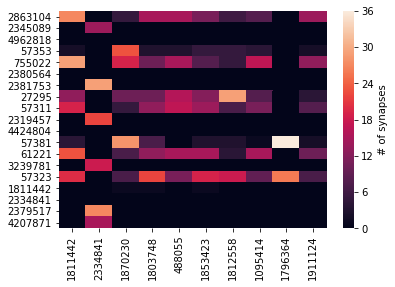

In [13]:
import seaborn as sns

adj_mat = pymaid.adjacency_matrix(pns, top_partners)

hm = sns.heatmap(adj_mat, cbar_kws=dict(label='# of synapses'))

plt.show()